Anthony Hyatt

Student ID#: 801115143

Homework #3

Link to GitHub: https://github.com/ahyatt7/IntroToML/blob/main/Homework_3.ipynb

In [263]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer

# **Problem 1**

In [264]:
MinMaxScaler,
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()
X = breast.data
Y = breast.target

breast_input = pd.DataFrame(X)
breast_input.head()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = GaussianNB()

model.fit(X_train, Y_train)
print(model)

expected = Y_test
predicted = model.predict(X_test)

print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

GaussianNB()
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        50
           1       0.91      0.91      0.91        64

    accuracy                           0.89       114
   macro avg       0.89      0.89      0.89       114
weighted avg       0.89      0.89      0.89       114

[[44  6]
 [ 6 58]]


Compared to the logistic regression classifier that was used in the last homework to classify this data, the Naive Bayes is slightly more innacurate. The following data was taken from the last homeowrk using logistic regression:

**Accuracy: 98.246%**

**Precision: 96.970%**

**Recall: 100.000%**

# **Problem 2**

In [265]:
X = breast.data
Y = breast.target
avg_acc = np.zeros(30)
avg_pre = np.zeros(30)
avg_rec = np.zeros(30)
avg = np.zeros(30)
accuracy = np.zeros(5)
precision = np.zeros(5)
recall = np.zeros(5)
bestK = np.zeros(2)
# This for loop iterates through n_components from 1-30
for K in range(1, 31):
  # This for loop iterates through each k-value multiple times and averages the
  # accuracies, recalls, and precisions to get a more accurate result
  for N in range(0, 5):
    X = breast.data
    Y = breast.target

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)

    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    pca = PCA(n_components=K)
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)

    classifier = LogisticRegression()
    classifier.fit(X_train, Y_train)

    Y_pred = classifier.predict(X_test)

    # Calculations for finding average statistics
    accuracy[N] = metrics.accuracy_score(Y_test, Y_pred)*100.0
    precision[N] = metrics.precision_score(Y_test, Y_pred)*100.0
    recall[N] = metrics.recall_score(Y_test, Y_pred)*100.0
  # Averages the data collected from each k-value
  avg_acc[K-1] = sum(accuracy)/5
  avg_pre[K-1] = sum(precision)/5
  avg_rec[K-1] = sum(recall)/5
  avg[K-1] = (avg_acc[K-1] + avg_pre[K-1] + avg_rec[K-1])/3
  # Tracks which k-value gives the highest accuracy
  if bestK[1] < avg_acc[K-1]:
    bestK[0] = K
    bestK[1] = avg_acc[K-1]
  print("K =", K, ":")
  print("Average Accuracy: %.3f%%" % avg_acc[K-1])
  print("Average Precision: %.3f%%" % avg_pre[K-1])
  print("Average Recall: %.3f%%" % avg_rec[K-1])
  print("Average Percent = %.3f%%" % avg[K-1])
  print()
print()

K = 1 :
Average Accuracy: 92.281%
Average Precision: 92.250%
Average Recall: 94.990%
Average Percent = 93.173%

K = 2 :
Average Accuracy: 93.333%
Average Precision: 92.659%
Average Recall: 97.356%
Average Percent = 94.449%

K = 3 :
Average Accuracy: 95.789%
Average Precision: 96.194%
Average Recall: 97.264%
Average Percent = 96.416%

K = 4 :
Average Accuracy: 96.316%
Average Precision: 95.561%
Average Recall: 98.892%
Average Percent = 96.923%

K = 5 :
Average Accuracy: 96.316%
Average Precision: 95.277%
Average Recall: 99.180%
Average Percent = 96.924%

K = 6 :
Average Accuracy: 95.789%
Average Precision: 94.578%
Average Recall: 99.191%
Average Percent = 96.520%

K = 7 :
Average Accuracy: 95.263%
Average Precision: 93.183%
Average Recall: 99.710%
Average Percent = 96.052%

K = 8 :
Average Accuracy: 97.544%
Average Precision: 96.152%
Average Recall: 100.000%
Average Percent = 97.899%

K = 9 :
Average Accuracy: 96.842%
Average Precision: 95.831%
Average Recall: 99.095%
Average Percent = 

Best K value = 19.0 with an average accuracy of 98.246%


Text(0, 0.5, 'Percentage')

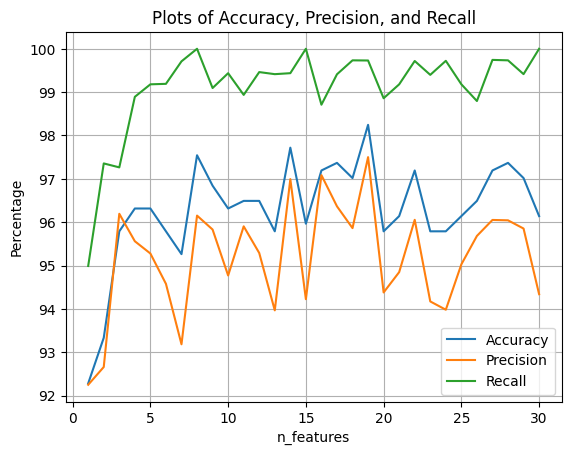

In [266]:
print("Best K value =", bestK[0], "with an average accuracy of %.3f%%" % bestK[1])

plt.figure()
plt.plot(range(1, 31), avg_acc)
plt.plot(range(1, 31), avg_pre)
plt.plot(range(1, 31), avg_rec)
plt.grid()
plt.legend(["Accuracy", "Precision", "Recall"])
plt.title("Plots of Accuracy, Precision, and Recall")
plt.xlabel("n_features")
plt.ylabel("Percentage")

After iterating through K features from 1 to 30, the ideal K-value seems to fluctuate quite a bit. However, the difference between the ideal K-value and a small K-value such as 3 isn't very large making the saved computation worth choosing a smaller K-value.

# **Problem 3**

In [267]:
avg_acc = np.zeros(30)
avg_pre = np.zeros(30)
avg_rec = np.zeros(30)
avg = np.zeros(30)
accuracy = np.zeros(5)
precision = np.zeros(5)
recall = np.zeros(5)
bestK = np.zeros(2)
# This for loop iterates through n_components from 1-30
for K in range(1, 31):
  # This for loop iterates through each k-value multiple times and averages the
  # accuracies, recalls, and precisions to get a more accurate result
  for N in range(0, 5):
    X = breast.data
    Y = breast.target

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)

    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    pca = PCA(n_components=K)
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)

    model = GaussianNB()
    model.fit(X_train, Y_train)

    expected = Y_test
    predicted = model.predict(X_test)

    # Calculations for finding average statistics
    accuracy[N] = metrics.accuracy_score(Y_test, Y_pred)*100.0
    precision[N] = metrics.precision_score(Y_test, Y_pred)*100.0
    recall[N] = metrics.recall_score(Y_test, Y_pred)*100.0
  # Averages the data collected from each k-value
  avg_acc[K-1] = sum(accuracy)/5
  avg_pre[K-1] = sum(precision)/5
  avg_rec[K-1] = sum(recall)/5
  avg[K-1] = (avg_acc[K-1] + avg_pre[K-1] + avg_rec[K-1])/3
  # Tracks which k-value gives the highest accuracy
  if bestK[1] < avg_acc[K-1]:
    bestK[0] = K
    bestK[1] = avg_acc[K-1]
  print("K =", K, ":")
  print("Average Accuracy: %.3f%%" % avg_acc[K-1])
  print("Average Precision: %.3f%%" % avg_pre[K-1])
  print("Average Recall: %.3f%%" % avg_rec[K-1])
  print("Average Percent = %.3f%%" % avg[K-1])
  print()
print()

K = 1 :
Average Accuracy: 57.018%
Average Precision: 61.975%
Average Recall: 73.315%
Average Percent = 64.103%

K = 2 :
Average Accuracy: 53.333%
Average Precision: 62.963%
Average Recall: 68.687%
Average Percent = 61.661%

K = 3 :
Average Accuracy: 54.737%
Average Precision: 62.469%
Average Recall: 70.384%
Average Percent = 62.530%

K = 4 :
Average Accuracy: 56.140%
Average Precision: 60.741%
Average Recall: 72.976%
Average Percent = 63.286%

K = 5 :
Average Accuracy: 54.386%
Average Precision: 60.988%
Average Recall: 70.870%
Average Percent = 62.081%

K = 6 :
Average Accuracy: 53.860%
Average Precision: 60.741%
Average Recall: 70.197%
Average Percent = 61.599%

K = 7 :
Average Accuracy: 55.263%
Average Precision: 61.975%
Average Recall: 71.300%
Average Percent = 62.846%

K = 8 :
Average Accuracy: 54.035%
Average Precision: 60.494%
Average Recall: 70.578%
Average Percent = 61.702%

K = 9 :
Average Accuracy: 50.175%
Average Precision: 58.519%
Average Recall: 67.111%
Average Percent = 5

Best K value = 18.0 with an average percentage of 59.298%


Text(0, 0.5, 'Percentage')

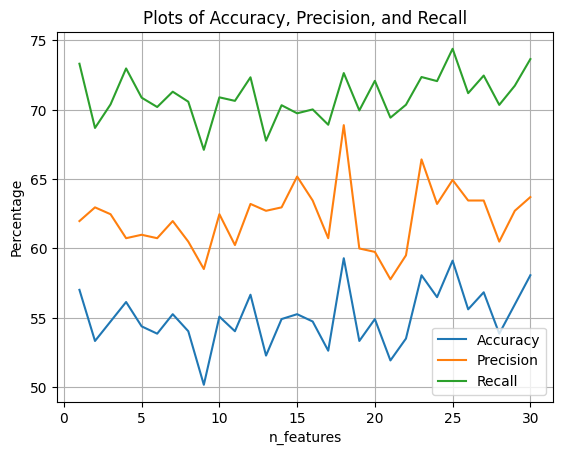

In [268]:
print("Best K value =", bestK[0], "with an average percentage of %.3f%%" % bestK[1])

plt.figure()
plt.plot(range(1, 31), avg_acc)
plt.plot(range(1, 31), avg_pre)
plt.plot(range(1, 31), avg_rec)
plt.grid()
plt.legend(["Accuracy", "Precision", "Recall"])
plt.title("Plots of Accuracy, Precision, and Recall")
plt.xlabel("n_features")
plt.ylabel("Percentage")

The difference between the accuracies, recalls, and precisions between problems 2 and 3 is drastic. The Naive Bayes performs much worse when compared with the logistic regression model.